## Extract All Data Points for a Device

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import DMT.core
import pandas as pd
preamble='\\usepackage{amsmath}\n\\usepackage{amsfonts}'
plt.rc('text',usetex=True)
plt.rc('text.latex',preamble=preamble)

In [3]:
CELLS_DIR = '../sky130_fd_pr/cells'
dut_type = 'nfet_01v8'
dut_tag = 'sky130_fd_pr__'+dut_type
fdir = CELLS_DIR+'/'+dut_type
flist0 = os.listdir(fdir)
flist_mdm = []

dut_sel = {'w':'1u', 'l':'0p15u', 'm':'1'}
for fn in flist0:
    if fn.endswith('.mdm'):
        flist_mdm.append(fn)
print(dut_tag)
print('{:d} mdm files'.format(len(flist_mdm)))

sky130_fd_pr__nfet_01v8
110 mdm files


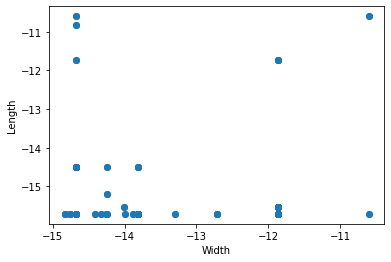

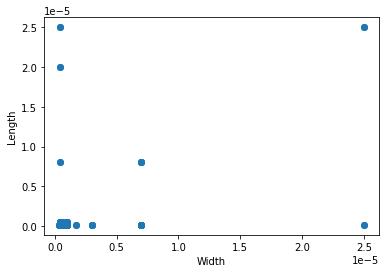

In [4]:
wllist = []
wllist_log = []
for fn in flist_mdm:
    fn0 = fn.split('.')[0]
    test_type = fn0.split('(')[1][:-1]
    dut_name  = fn0.split('(')[0]
    parts = dut_name.split('_')
    w  = None  # Must be in the file name
    l  = None  # Must be in the file name
    nf = 1     # Ignored by default
    m  = 1     # Should be there as well
    #print(dut_name)
    for e in parts:
        if len(e)>0:
            if e[0]=='w':
                # Width
                e = e.replace('p','.').replace('u','e-6')
                w = float(e[1:])

            if e[0]=='l':
                # Length
                e = e.replace('p','.').replace('u','e-6')
                l = float(e[1:])

            if e.startswith('m'):
                # Multiplier
                # Note that this parameter should be an integer
                m = int(e[1:])
    if (w==None) or (l==None):
        print('Error: Unknown Device Size, Excluded: '+fn0)
    else:
        # print('Device: W={}, L={}, M={}'.format(w,l,m))
        
        # Exclude m!=1
        #if m==1:
        if True:
            # Exclude large devices
            wllist.append((w,l))
            wllist_log.append((np.log(w),np.log(l)))
            
            
# Sort by Width
wllist_ws = sorted(wllist, key=lambda element: (element[0], element[1]))
# Sort by Length
wllist_ls = sorted(wllist, key=lambda element: (element[1], element[0]))

plt.scatter(*zip(*wllist_log))
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

plt.scatter(*zip(*wllist))
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()  

3.600E-07: 3
3.900E-07: 3
4.200E-07: 17
5.500E-07: 1
6.000E-07: 1
6.400E-07: 1
6.500E-07: 1
8.400E-07: 1
9.400E-07: 1
1.000E-06: 11
1.680E-06: 1
3.000E-06: 3
7.000E-06: 9
2.500E-05: 1


Text(0.5, 0, '#')

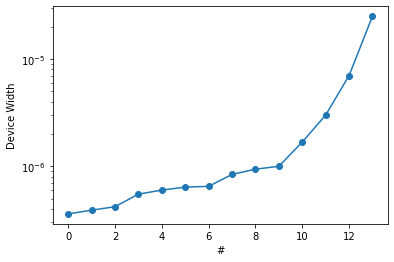

In [5]:
wlist = {}
for e in wllist_ls:
    if e[1]==1.5e-7:
        if e[0] in wlist:
            wlist[e[0]] += 1
        else:
            wlist[e[0]] = 0
for e in wlist.keys():
    print('{:.3E}: {}'.format(e,wlist[e]))
plt.semilogy(list(wlist.keys())[:],'-o')
plt.ylabel('Device Width')
plt.xlabel('#')

In [6]:
def get_wl_group(wt,lt:float=None,mt:int=1, debug=False):
    # Accepts (W,L) tuple as an input
    if lt==None:
        lt = wt[1]
        wt = wt[0]
    
    flist_out = []
    for fn in flist_mdm:
        fn_wlm = fn[len(dut_tag)+1:-4].split('(')[0].split('_')
        fn_run = fn[len(dut_tag)+1:-4].split('(')[1][:-1]
        w = None
        l = None
        m = 1
        for e in fn_wlm:
            if len(e)>0:
                if e[0]=='w':
                    # Width
                    e = e.replace('p','.').replace('u','e-6')
                    w = float(e[1:])

                if e[0]=='l':
                    # Length
                    e = e.replace('p','.').replace('u','e-6')
                    l = float(e[1:])

                if e.startswith('m'):
                    # Multiplier
                    # Note that this parameter should be an integer
                    m = int(e[1:])
        if(w == wt) and (l == lt) and (m == mt):
            if(debug):
                print(w,l,m,fn_run)
            flist_out.append(fn)
    return flist_out

# Note: for the same W/L combination, the test structure provides different STI parameter SA/SB 
#       to simulate well-proximity effect
def get_mod_pin:
    pass

In [24]:
import csv
testtile_info_list = []
with open('../docs/sky130-testtile-proprietary/sky130-testtile-pad-documentation.csv', newline='') as csvfile:
    testtile_info_reader = csv.reader(csvfile)
    for line in testtile_info_reader:
        testtile_info_list.append(line)
        


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(line)? (3525761372.py, line 11)

In [36]:
# This is hard-coded
tti_nshort_list = []
for line in testtile_info_list:
    if line[4].startswith('nshort;'):
        tti_nshort_list.append(line)
        print(line)
        
# (g,d)->(SA,SB)

tile_id = 8434
record_start = None
record_end   = None
for i in range(len(tti_nshort_list)):
    line = tti_nshort_list[i]
    if record_start != None:
        if (line[0] != '') and (line[0]!=str(tile_id)):
            record_end = i
            break;
    elif line[0]==str(tile_id):
        record_start = i

['', '', '', 'nshort', 'nshort; w/l=0.64/0.15; licon resistance; n_licons=4,608; contact-gate=0.055u', '', '', 'r0', 'r1', '', 'G/S/B (vgnd=0V)', '', '', '', '', '', '', '']
['', '', '', 'nshort', 'nshort; w/l=0.64/0.15; licon resistance; n_licons=4,608; contact-gate=0.055u', '', '', 'r0', '', 'r2', 'G/S/B (vgnd=0V)', '', '', '', '', '', '', '']
['', '', '', 'nshort', 'nshort; w/l=0.64/0.15; licon resistance; n_licons=4,608; contact-gate=0.050u', 'r0', 'r1', '', '', '', 'G/S/B (vgnd=0V)', '', '', '', '', '', '', '']
['', '', '', 'nshort', 'nshort; w/l=0.64/0.15; licon resistance; n_licons=4,608; contact-gate=0.050u', 'r0', '', 'r2', '', '', 'G/S/B (vgnd=0V)', '', '', '', '', '', '', '']
['5290', '', '', 'nshort', 'nshort; w=0.36; l=0.15; m=2280;', 'b', 'g', 'd', '', '', '', '', '', '', '', '', '', '3']
['', '', '', 'nshort', 'nshort; w=0.39; l=0.15; m=2190;', 'b', 'g', '', 'd', '', '', '', '', '', '', '', '', '']
['', '', '', 'nshort', 'nshort; w=0.65; l=0.15; m=1560;', 'b', 'g', '', '

In [58]:
N_pins = 12
debug = False

sab_lookup = {}
for line in tti_nshort_list[record_start:record_end]:
    # Extract W/L/M/SA/SB
    # Ignoring prox_count for now, this should always be zero in this run
    if debug:
        print(line)
    dev_type = 'nshort'
    w = None
    l = None
    m = None
    sa = None
    sb = None
    info = line[4].replace(' ','').split(';')
    for e in info:
        if e[0]=='w':
            w = float(e[2:])
        elif e[0]=='l':
            l = float(e[2:])
        elif e[0]=='m':
            m = float(e[2:])
        elif e.startswith('sa'):
            sa = float(e[3:])
        elif e.startswith('sb'):
            sb = float(e[3:])
    info_list = [dev_type,w,l,m,sa,sb]
    print(info_list)
    pin_list = {}
    for i in range(12):
        e = line[5+i]
        if e!='':
            pin_list[e] = i+1
            
    pin_idn = (pin_list['s'],pin_list['d'])
    print(pin_idn)
    sab_lookup[pin_idn] = (sa,sb)

['nshort', 7.0, 0.18, 1.0, 2.5, 2.5]
(3, 4)
['nshort', 7.0, 0.18, 1.0, 1.11, 1.11]
(4, 5)
['nshort', 7.0, 0.18, 1.0, 0.68, 0.68]
(5, 6)
['nshort', 7.0, 0.18, 1.0, 0.48, 0.48]
(6, 7)
['nshort', 7.0, 0.18, 1.0, 0.35, 0.35]
(7, 8)
['nshort', 7.0, 0.18, 1.0, 0.265, 0.265]
(8, 9)
['nshort', 7.0, 0.15, 1.0, 2.5, 2.5]
(9, 10)
['nshort', 7.0, 0.15, 1.0, 1.11, 1.11]
(10, 11)
['nshort', 7.0, 0.15, 1.0, 0.68, 0.68]
(11, 12)


In [96]:
# Put all I/V data of a given device (W/L) into one large data frame

key = 'sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1'
fnl_wl_group = get_wl_group((7e-06, 1.8e-07))
fnl_wl_group_sorted = sorted(fnl_wl_group, key=lambda e: (e[43],e[45])) # Sort by pin position
sasb_list_all = []
for i in range(len(fnl_wl_group_sorted)):
    line = fnl_wl_group_sorted[i]
    idn_parts = line[:-5].split('(')[1].split('_')
    sasb_list_all.append( sab_lookup[(int(idn_parts[1]),int(idn_parts[2]))] )
    print(idn_parts)
    
vd_list_all  = [] # Different SA/SB
vg_list_all  = [] # Different SA/SB
ids_list_all = [] # Different SA/SB
for key in fnl_wl_group_sorted:
    meas = DMT.core.DutMeas(
        database_dir = None,
        dut_type = DMT.core.DutType.device,
        name = key,
        reference_node = 'E')
    meas.add_data(fdir+'/'+key, key=key)
    df0 = meas.data[key]
    # Extract (VGS,VDS) -> IDS
    gb = df0.groupby(['VB'])
    a = gb.get_group((0.0)).drop(['VB','VS','IB','IG'], axis=1).sort_values(by=['VD','VG']).reset_index()
    agb = a.groupby(['VD','VG','ID'])
    vd_list  = []
    vg_list  = []
    ids_list = []
    for g in agb.groups:
        vd_list.append(g[0])
        vg_list.append(g[1])
        ids_list.append(g[2])
        
    vd_list_all.append( vd_list)
    vg_list_all.append( vg_list)
    ids_list_all.append(ids_list)

['8434', '3', '4', 'IDVG']
['8434', '3', '4', 'IDVD']
['8434', '4', '5', 'IDVG']
['8434', '4', '5', 'IDVD']
['8434', '5', '6', 'IDVD']
['8434', '5', '6', 'IDVG']
['8434', '6', '7', 'IDVG']
['8434', '6', '7', 'IDVD']
['8434', '7', '8', 'IDVG']
['8434', '7', '8', 'IDVD']
['8434', '8', '9', 'IDVG']
['8434', '8', '9', 'IDVD']


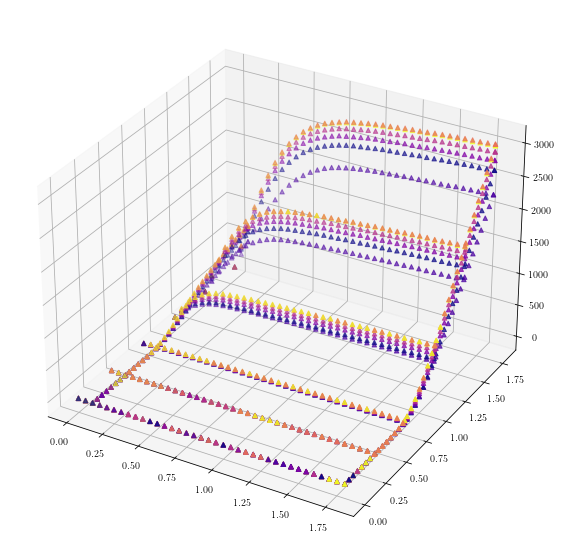

In [119]:

# Show (VGS, VDS) Coverage
my_cmap = plt.get_cmap('plasma')
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')

vd_list_flatten   = []
vg_list_flatten   = []
ids_list_flatten  = []
sasb_list_flatten = []

for i in range(len(sasb_list_all)):
# for i in [0,1,10,11]:
    dlen = len(vd_list_all[i])
    vd_list_flatten  +=vd_list_all[i]
    vg_list_flatten  +=vg_list_all[i]
    ids_list_flatten +=ids_list_all[i]
    sasb_list_flatten+=[np.log(sasb_list_all[i][0])]*dlen

sctt3d = ax.scatter3D(vd_list_flatten, vg_list_flatten, list(e*1e6 for e in ids_list_flatten), c=sasb_list_flatten, cmap = my_cmap, marker ='^')

import scipy.io as sio

# Save Data into a MATLAB .mat
mat = {}
mat['vd_list_flatten'] = vd_list_flatten
mat['vg_list_flatten'] = vg_list_flatten
mat['ids_list_flatten'] = ids_list_flatten
mat['sasb_list_flatten'] = sasb_list_flatten

key = 'sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1'
sio.savemat(key+'_ids_v_vg_vd.mat',mat)

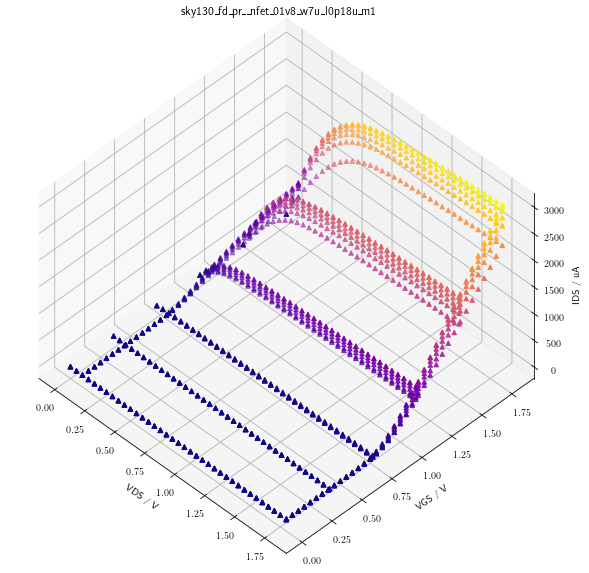

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:

# Show (VGS, VDS) Coverage
my_cmap = plt.get_cmap('plasma')
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
ids_list_uA = list(e*1e6 for e in ids_list)
sctt3d = ax.scatter3D(vd_list, vg_list, ids_list_uA, c=ids_list, cmap = my_cmap, marker ='^')
ax.set_xlabel('VDS / V')
ax.set_ylabel('VGS / V')
ax.set_zlabel('IDS / uA')
ax.set_title(key)
ax.set_proj_type('ortho')
ax.view_init(45, -45)
plt.show()
plt.savefig(key+'_IDS_v_VGS_VDS.svg')
sctt3d_vg = ax.scatter3D(vd_list, vg_list, ids_list_uA, c=vd_list, cmap = my_cmap, marker ='^')
ax.view_init(0, 0)
plt.show()
plt.savefig(key+'_IDS_v_VGS.svg')

sctt3d_vd = ax.scatter3D(vd_list, vg_list, ids_list_uA, c=vg_list, cmap = my_cmap, marker ='^')
ax.view_init(0, -90)
plt.show()
plt.savefig(key+'_IDS_v_VDS.svg')


6.4e-07